In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup as bs
from lxml import html

from PIL import Image
import io
from selenium.common.exceptions import ElementClickInterceptedException
from selenium.webdriver.common.action_chains import ActionChains

import requests
import time
import csv
import re 
import os

import numpy as np
import pandas as pd
import random

In [2]:
header_list=[{'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.157 Safari/537.36COOKIE: 5=2; ax=v167-7'},
       {'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/74.0.3729.157 Safari/537.36'},
       {'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/79.0.3945.88 Safari/537.36'},
       {'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.87 Safari/537.36'},
       {'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36'},
       {'User-Agent':'Mozilla/5.0 (X11; Datanyze; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Safari/537.36'},
       {'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.24 Safari/537.36'}]

def head():
    n = random.random()
    n=int(n*7)
    return header_list[n]

In [4]:
file = pd.read_csv('temp.csv')
file.head()

,Unnamed: 0,City_Name,Establishment_Type,Name,Rating,No_of_Reviews,Other_Ratings,Timings,Latitude,Longitude,...,Range_n_Cuisine,Address,Contact_No,Changed_Tag,Range_Cuisine_new,Cuisine,Cuisines,Meals,Special Diets,PRICE RANGE
0,3,Abbotsford,Restaurant,Townhall Public House Abbotsford,4.0,123,"{'Food': 3.5, 'Service': 4.0, 'Value': 3.5, 'A...","[{'days': 'Sun', 'times': ['10:00 AM - 12:00 A...",49.047710,-122.291150,...,"['$$ - $$$', 'Bar', 'Gastropub', 'Canadian']","33720 South Fraser Way, Abbotsford, British Co...",+1 604-746-2000,All reviews brunch fish chips salad pub fo...,"Bar,Gastropub,Canadian","Gastropub, Bar, Canadian","Gastropub, Bar, Canadian,Bar,Gastropub,Canadian",None,NaN,NaN
1,8,Abbotsford,Restaurant,White Spot,4.0,80,"{'Food': 4.5, 'Service': 4.5, 'Value': 4.0, 'A...",NaN,49.037080,-122.225850,...,"['$$ - $$$', 'Canadian', 'Vegetarian Friendly'...","36063 North Parallel Rd, Abbotsford, British C...",+1 604-864-5744,All reviews eggs bacon burger fries salad ...,"Canadian,Vegetarian,Friendly,Gluten,Free,Options",Canadian,"Canadian,Canadian,Vegetarian,Friendly,Gluten,F...","Breakfast, Lunch, Dinner, Brunch","Breakfast, Lunch, Dinner, Brunch",None
2,12,Abbotsford,Restaurant,Common Place Cafe,4.5,18,"{'Food': 4.5, 'Service': 4.0, 'Value': 4.0}","[{'days': 'Mon - Sat', 'times': ['7:00 AM - 4:...",49.044353,-122.281450,...,"['₹', 'Canadian', 'Vegetarian Friendly', 'Vega...","33933 Gladys Ave MCC Centre, Abbotsford, Briti...",+1 604-851-7737,All reviews borscht fair trade cottage chee...,"Canadian,Vegetarian,Friendly,Vegan,Options",Canadian,"Canadian,Canadian,Vegetarian,Friendly,Vegan,Op...","Breakfast, Lunch, Brunch","Breakfast, Lunch, Brunch",None
3,15,Abbotsford,Restaurant,Ricardo's Pizza,4.5,58,"{'Food': 4.0, 'Service': 4.0, 'Value': 4.0, 'A...","[{'days': 'Sun', 'times': ['11:00 AM - 10:00 P...",49.055172,-122.317184,...,"['$$ - $$$', 'Italian', 'Pizza', 'Canadian']","6-32750 George Ferguson Way, Abbotsford, Briti...",+1 604-859-1112,All reviews pizza pineapple ham salad bbq...,"Italian,Pizza,Canadian","Italian, Pizza, Canadian","Italian, Pizza, Canadian,Italian,Pizza,Canadian","Lunch, Dinner","Lunch, Dinner",None
4,18,Abbotsford,Restaurant,Keg Restaurant & Bar,4.0,199,"{'Food': 4.0, 'Service': 4.0, 'Value': 3.5, 'A...","[{'days': 'Sun - Sat', 'times': ['4:00 PM - 10...",49.041615,-122.277780,...,"['$$ - $$$', 'American', 'Steakhouse', 'Bar']","2142 West Railway St, Abbotsford, British Colu...",+1 604-855-9893,All reviews prime rib steak half lobster c...,"American,Steakhouse,Bar","Steakhouse, Bar, Canadian, American","Steakhouse, Bar, Canadian, American,American,S...","Dinner, After-hours","Dinner, After-hours",None


In [5]:
res_data = file[pd.isna(file['Timings'])][['Name', 'Address']]
res_data['Place'] = res_data['Name'] + ' ' + res_data['Address']
res_data = res_data.drop(['Name', 'Address'], axis=1).reset_index(drop=True)
res_data.shape

(2861, 1)

In [6]:
keywords = res_data.values
keywords[:5]

array([['White Spot 36063 North Parallel Rd, Abbotsford, British Columbia V3G 2C6 Canada'],
       ['Sprouted Oven 115-1828 McCallum Rd, Abbotsford, British Columbia V2S 0H9 Canada'],
       ['Sasha Sushi 2070 Sumas Way #108, Abbotsford, British Columbia V2S 2C7 Canada'],
       ['Roseland Family Restaurant 12-33550 South Fraser Way, Abbotsford, British Columbia V2S 5G7 Canada'],
       ['COBS Bread 2777 Gladwin Rd Unit 111, Abbotsford, British Columbia V2T 4V1 Canada']],
      dtype=object)

In [60]:
# path_chrome = r"C:\Users\Lenovo\chromedriver"
# ua = head()
# user_agent = "user-agent="+ua['User-Agent']
# chrome_options= webdriver.ChromeOptions()
# #chrome_options.add_argument('--headless')
# #chrome_options.add_argument('--no-sandbox')
# #chrome_options.add_argument('--disable-dev-shm-usage')
# #chrome_options.add_argument(user_agent)
# print('user-agent\n',user_agent)
# driver = webdriver.Chrome(path_chrome,options=chrome_options)
# print('opening defualt page')
# url  = 'https://www.google.com/maps/@30.7678096,76.4684188,14z'

# driver.get(url)

# element = driver.find_element_by_xpath("//input[@id='searchboxinput']")
# search  = driver.find_element_by_xpath("//button[@id='searchbox-searchbutton']")
# element.clear()
# element.send_keys(keywords[4])
# search.click()

user-agent
 user-agent=Mozilla/5.0 (X11; Datanyze; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Safari/537.36
opening defualt page


In [61]:
# time.sleep(20)
# response = bs(driver.page_source, 'html.parser')

<html itemscope="" itemtype="http://schema.org/Place" jstcache="0" lang="en-IN"><head> <link href="/maps/preview/opensearch.xml?hl=en" rel="search" title="Google Maps" type="application/opensearchdescription+xml"/> <title>COBS Bread Bakery - Google Maps</title> <meta content=" Find local businesses, view maps and get driving directions in Google Maps. " name="Description"/> <meta content="initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/> <meta content="chrome=1" http-equiv="X-UA-Compatible"/> <meta content="notranslate" name="google"/> <meta content="origin" name="referrer"/> <meta content="Google Maps" itemprop="name"/> <meta content="Google Maps" property="og:title"/> <meta content="https://maps.google.com/maps/api/staticmap?center=30.7678096%2C76.4684188&amp;zoom=14&amp;size=256x256&amp;language=en&amp;sensor=false&amp;client=google-maps-frontend&amp;signature=CT798-0_HL9iFQcuuwXEji1tp7w" itemprop="image"/> <meta content="https://maps.googl
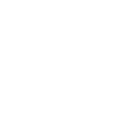
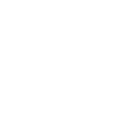

In [62]:
# response

In [63]:
# title = response.find_all('title')
# title[0].text.split(' - ')[0]

'COBS Bread Bakery'

In [64]:
# ratings = response.find('span', class_='section-star-display')
# ratings.text

'4.5'

In [236]:
# res_type = response.find_all('button', class_='widget-pane-link')
# res_type[4].text

'Bakery and Cake Shop'

In [65]:
# driver.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[7]/button').click()
# time.sleep(2)
# soup = bs(driver.page_source, 'html.parser')

In [66]:
# services = soup.find_all('div', class_='section-attribute-group-item')
# services

[<div aria-label="Offers takeaway" class="section-attribute-group-item" jsan="7.section-attribute-group-item,0.aria-label,0.role" jsinstance="0" jstcache="1244" role="group"> <img alt="" class="section-attribute-group-item-icon" jstcache="1245" src="//www.gstatic.com/images/icons/material/system_gm/2x/check_black_18dp.png"/> <span aria-hidden="true" jsan="0.aria-hidden" jstcache="1246">Takeaway</span> </div>,
 <div aria-label="No delivery" class="section-attribute-group-item section-attribute-group-item-negative" jsan="7.section-attribute-group-item,7.section-attribute-group-item-negative,0.aria-label,0.role" jsinstance="*1" jstcache="1244" role="group"> <img alt="" class="section-attribute-group-item-icon" jstcache="1245" src="//www.gstatic.com/images/icons/material/system_gm/2x/not_interested_black_18dp.png"/> <span aria-hidden="true" jsan="0.aria-hidden" jstcache="1246">Delivery</span> </div>,
 <div aria-label="Has wheelchair-accessible car park" class="section-attribute-group-item"

In [67]:
# serv_dic = {}

# for i in services:
    
#     if not i.find('div', class_='section-attribute-group-item-icon maps-sprite-place-attributes-not-interested'):
#         serv_dic[i.text.replace(' ', '')] = 1
    
#     else:
#         serv_dic[i.text.replace(' ', '')] = 0

# serv_dic

{'Takeaway': 1,
 'Delivery': 1,
 'Wheelchair-accessiblecarpark': 1,
 'Wheelchair-accessibleentrance': 1,
 'MobileWallets': 1}

In [68]:
# driver.back()
# time.sleep(2)

In [70]:
# driver.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[12]/div[1]').click()

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=86.0.4240.111)


In [243]:
# soup = bs(driver.page_source, 'html.parser')

# timings = soup.find_all('tr', class_='lo7U087hsMA__row-row')

In [244]:
# timing_dic = {}

# for i in timings:
#     timing_dic[i.text.split('   ')[0].replace(' ', '')] = i.text.split('   ')[1]

# timing_dic

{'Tuesday': ' 7am–6pm  Holiday hours Hours might differ',
 'Wednesday': ' 7am–6pm  Holiday hours Hours might differ',
 'Thursday': ' 7am–6pm  Holiday hours Hours might differ',
 'Friday': ' 7am–6pm  Holiday hours Hours might differ',
 'Saturday': ' 7am–6pm  Holiday hours Hours might differ',
 'Sunday': ' 7am–6pm  Holiday hours Hours might differ',
 'Monday': ' 7am–6pm  Holiday hours Hours might differ'}

In [72]:
# soup = bs(driver.page_source, 'html.parser')

# rating = soup.find('div', class_='jqnFjrOWMVU__right')
# rating.text

' 4.5  124 reviews  '

In [73]:
# tags = soup.find_all('div', class_='tuPVDR7ouq5__has-right-neighbor')
# tags[0]

<div class="tuPVDR7ouq5__has-right-neighbor tuPVDR7ouq5__selected" jsan="t-jxx6LQI5Ld0,7.tuPVDR7ouq5__has-right-neighbor,7.tuPVDR7ouq5__selected" jstcache="1220"><div class="tuPVDR7ouq5__taparea" jsaction="pane.wfvdle63" jstcache="980"><button aria-label="All reviews" aria-pressed="true" class="tuPVDR7ouq5__button gm2-hairline-border section-input-chip-button" data-tooltip="All reviews" jsaction="pane.wfvdle63;focus:pane.focusTooltip;blur:pane.blurTooltip" jsan="7.tuPVDR7ouq5__button,7.gm2-hairline-border,7.section-input-chip-button,0.aria-label,0.aria-pressed,0.data-tooltip,0.jsaction" jstcache="981"><img jstcache="982" style="display:none"/><span class="tuPVDR7ouq5__text gm2-body-2" jsan="7.tuPVDR7ouq5__text,7.gm2-body-2" jstcache="983">All</span><span jstcache="984" style="display:none"></span><img jstcache="985" style="display:none"/><div jstcache="986" style="display:none"></div></button></div></div>

In [74]:
# for i in tags[1:]:
#     print(i.text)

scones6
seed4
sourdough bread4
cinnamon buns4
sweet4


In [75]:
# driver.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[50]/div/div/button').click()

In [76]:
# recentList = driver.find_elements_by_xpath('//*[@id="pane"]/div')
# for list in recentList:
#     driver.execute_script("arguments[0]")

In [77]:

# while(True):
#     try:
#         element = driver.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[2]/div[10]')

#         actions = ActionChains(driver)
#         actions.move_to_element(element).perform()
    
#     except:
#         break

<html itemscope="" itemtype="http://schema.org/Place" jstcache="0" lang="en-IN"><head> <link href="/maps/preview/opensearch.xml?hl=en" rel="search" title="Google Maps" type="application/opensearchdescription+xml"/> <title>COBS Bread Bakery - Google Maps</title> <meta content=" Find local businesses, view maps and get driving directions in Google Maps. " name="Description"/> <meta content="initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/> <meta content="chrome=1" http-equiv="X-UA-Compatible"/> <meta content="notranslate" name="google"/> <meta content="origin" name="referrer"/> <meta content="Google Maps" itemprop="name"/> <meta content="Google Maps" property="og:title"/> <meta content="https://maps.google.com/maps/api/staticmap?center=30.7678096%2C76.4684188&amp;zoom=14&amp;size=256x256&amp;language=en&amp;sensor=false&amp;client=google-maps-frontend&amp;signature=CT798-0_HL9iFQcuuwXEji1tp7w" itemprop="image"/> <meta content="https://maps.googl
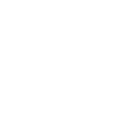
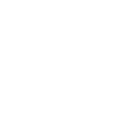

In [78]:
# rev_soup = bs(driver.page_source, 'html.parser')
# rev_soup

In [79]:
# reviews = rev_soup.find_all('div', class_='section-review ripple-container GLOBAL__gm2-body-2')
# reviews

[<div aria-label="Siberia" class="section-review ripple-container GLOBAL__gm2-body-2" data-review-id="ChdDSUhNMG9nS0VJQ0FnSURDNVlDR2xBRRAB" jsan="t-4VhXSdTzr88,7.section-review,7.ripple-container,7.GLOBAL__gm2-body-2,0.aria-label,0.data-review-id,0.jstrack,0.vet" jstcache="1221" jstrack="gPCbX7-5HI7Z5OUP7-WhyAg:179" vet="21866"> <div data-review-id="ChdDSUhNMG9nS0VJQ0FnSURDNVlDR2xBRRAB" jsaction="mouseover:pane.review.in;mouseout:pane.review.out" jsan="0.data-review-id,22.jsaction" jstcache="988"> <div jstcache="989" style="display:none"></div> <div jstcache="990" style="display:none"> </div> <div class="section-review-content" jsan="7.section-review-content" jstcache="991"> <div jstcache="992"> <a aria-label=" Photo of Siberia " class="section-review-reviewer-link" href="https://www.google.com/maps/contrib/103644771925469096769/reviews?hl=en-IN" jsaction="pane.wfvdle71" jsan="7.section-review-reviewer-link,8.href,0.jsaction,0.aria-label,0.target,t-ulS6GVkCn2o" jstcache="1133" target="

In [81]:
# title = reviews[0].find('div', class_='section-review-title')
# title.text.replace(' ','')

'Siberia'

In [82]:
# stars = reviews[0].find('span', class_='section-review-stars')
# stars['aria-label']

' 5 stars '

In [83]:
# rev_text = reviews[0].find('span',class_='section-review-text')
# rev_text.text

'Very well organized to keep everyone safe. Only 2 customers at a time in store and kept apart. A staff member wiping down the doorway constantly and staff wearing masks. I appreciate the efforts and have no problem visiting again.'

In [84]:
# coord = driver.current_url.split('z')[0].split('@')[1].split(',')[:2]
# coord

['49.0517789', '-122.3176498']

In [9]:
def scrape_gmap(names):
    
    ans = []
    path_chrome = r"C:\Users\Lenovo\chromedriver"
    ua = head()
    user_agent = "user-agent="+ua['User-Agent']
    chrome_options= webdriver.ChromeOptions()
    #chrome_options.add_argument('--headless')
    #chrome_options.add_argument('--no-sandbox')
    #chrome_options.add_argument('--disable-dev-shm-usage')
    #chrome_options.add_argument(user_agent)
    #print('user-agent\n',user_agent)
    driver = webdriver.Chrome(path_chrome,options=chrome_options)
    #print('opening defualt page')
    url  = 'https://www.google.com/maps/@30.7678096,76.4684188,14z'

    driver.get(url)
    
    for name in names:
        try:
            element = driver.find_element_by_xpath("//input[@id='searchboxinput']")
            search  = driver.find_element_by_xpath("//button[@id='searchbox-searchbutton']")
            element.clear()
            element.send_keys(name)
            search.click()

            time.sleep(30)
            try:
                try:
                    driver.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[12]/div[1]').click()
                except:
                    driver.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[11]/div[1]').click()
            except:
                ans.append('None')
                continue

            time.sleep(2)

            soup = bs(driver.page_source, 'html.parser')
            timings = soup.find_all('tr', class_='lo7U087hsMA__row-row')

            timing_dic = {}
            for i in timings:
                timing_dic[i.text.split('   ')[0].replace(' ', '')] = i.text.split('   ')[1]
            
            title = soup.find_all('title')
            title = title[0].text.split(' - ')[0]
            
            ratings = response.find('span', class_='section-star-display')
            rating = ratings.text
            
            res_type = response.find_all('button', class_='widget-pane-link')
            type_ = res_type[4].text
            
            driver.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[7]/button').click()
            time.sleep(5)
            soup = bs(driver.page_source, 'html.parser')
            services = soup.find_all('div', class_='section-attribute-group-item')
            
            serv_dic = {}
            for i in services:
                if not i.find('div', class_='section-attribute-group-item-icon maps-sprite-place-attributes-not-interested'):
                    serv_dic[i.text.replace(' ', '')] = 1
                else:
                    serv_dic[i.text.replace(' ', '')] = 0
                    
            driver.back()
            time.sleep(5)
            soup = bs(driver.page_source, 'html.parser')
            
            Tags = []
            tags = soup.find_all('div', class_='tuPVDR7ouq5__has-right-neighbor')
            for i in tags[1:]:
                Tags.append(i.text)
            
            driver.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[52]/div/div/button').click()
            time.sleep(5)
            
            while(True):
                try:
                    element = driver.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[2]/div[10]')
                    actions = ActionChains(driver)
                    actions.move_to_element(element).perform()
                except:
                    break
            
            rev_soup = bs(driver.page_source, 'html.parser')
            reviews = rev_soup.find_all('div', class_='section-review ripple-container GLOBAL__gm2-body-2')
            
            comments = []
            for i in range(len(reviews)):
                rev_title = reviews[i].find('div', class_='section-review-title').text.replace(' ','')
                stars = reviews[0].find('span', class_='section-review-stars')['aria-label']
                rev_text = reviews[0].find('span',class_='section-review-text').text
                
                rev_dict = ({'title' : rev_title, 'rate' : stars, 'info' : rev_text})
                comments.append(rev_dict)
            
            driver.back()
            coord = driver.current_url.split('z')[0].split('@')[1].split(',')[:2]
            
            data_dict = ({'Title' : title, 'Rating' : rating, 'Type' : type_, 'Services' : serv_dic, 'Tags' : Tags,
                         'Timings' : timing_dic, 'Coordinates' : coord, 'Comments' : comments})
            ans.append(data_dict)
        
        except:
            ans.append('None')
    
    return ans

In [10]:
res = scrape_gmap(keywords[:2])

In [12]:
res[1]

'None'

In [124]:
res[0]['Comments'][0]

{'title': 'DougShore',
 'rate': ' 4 stars ',
 'info': 'Nice atmosphere. Prices on the higher side. Fish and chips excellent. French fries are 1 inch long or less, expect to eat with a spoon not a fork, forget your fingers, waitress said this is normal, Used to be nice long fries these ones are …'}